In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


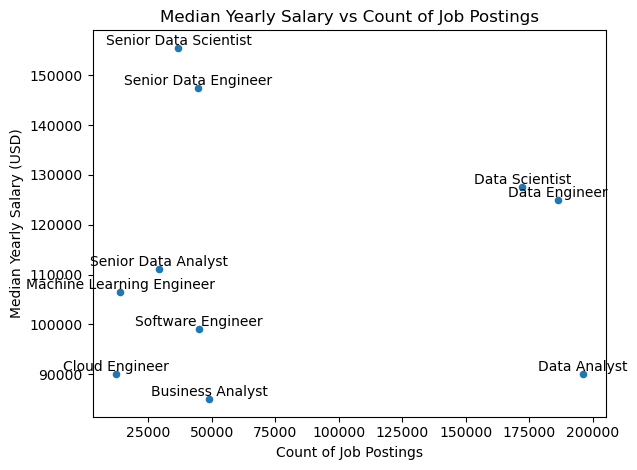

In [13]:
salary_stats = df.groupby('job_title_short').agg(
    median_salary=('salary_year_avg','median'),
    job_count=('job_title_short','count')
).dropna()

salary_stats.plot(kind='scatter', x='job_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')
plt.tight_layout()

for i in range(len(salary_stats)):
    count = salary_stats['job_count'].iloc[i]
    salary = salary_stats['median_salary'].iloc[i]
    job_title = salary_stats.index[i]
    plt.text(count, salary, job_title, ha='center',va='bottom')

plt.show()

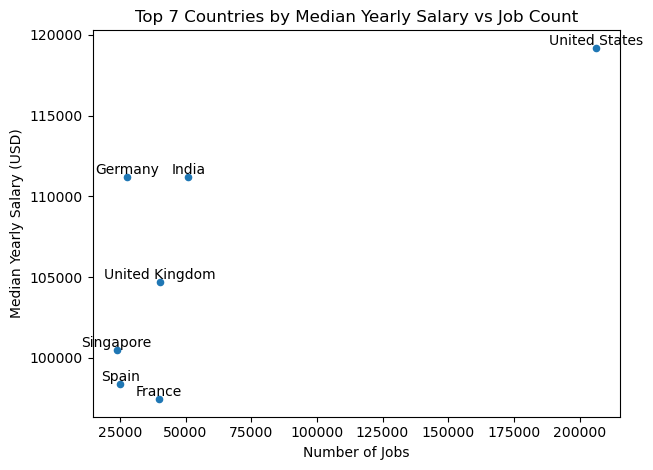

In [20]:
country_stats = df.groupby('job_country').agg(
    median_salary=('salary_year_avg','median'),
    job_count=('job_title_short','count')
).sort_values(by='job_count', ascending=False).head(7)
country_stats.plot(kind='scatter', x='job_count', y='median_salary' )
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries by Median Yearly Salary vs Job Count')
plt.tight_layout()

for i in range(len(country_stats)):
    job_count = country_stats['job_count'].iloc[i]
    median_salary = country_stats['median_salary'].iloc[i]
    country = country_stats.index[i]
    plt.text(job_count, median_salary, country, ha='center', va='bottom')

plt.show()

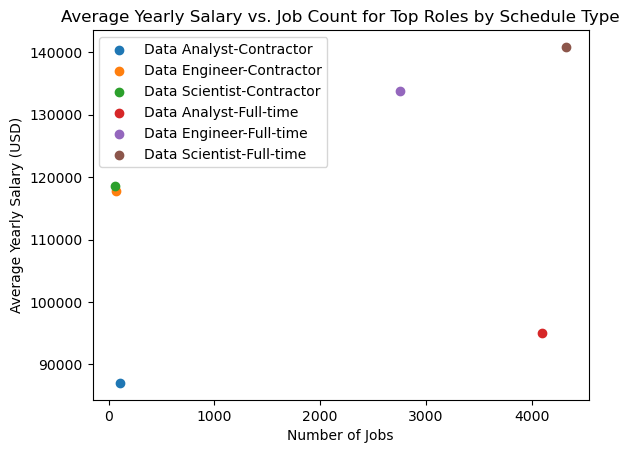

In [41]:
#filtering
df_filtered = df[
    (df['job_country'] == 'United States') &
    (df['job_title_short'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer']))&
    (df['job_schedule_type'].isin(['Full-time', 'Contractor']))
    ].dropna(subset='salary_year_avg').copy()


#calc
US_count =df_filtered.groupby(['job_schedule_type', 'job_title_short']).agg(
    mean_yearly_salary = ('salary_year_avg', 'mean'),
    job_count = ('job_title_short', 'count')
).dropna()

#reset_index
US_count.reset_index(inplace=True)

#Combine: Needs to reset index to work
US_count['job_title_schedule'] = US_count['job_title_short'] + '-' + US_count['job_schedule_type']

for job_title_type in US_count['job_title_schedule'].unique():
    subset = US_count[US_count['job_title_schedule'] == job_title_type]
    plt.scatter(subset['job_count'], subset['mean_yearly_salary'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()